# Задача 1

Сгенерируйте $M=100$ выборок $X_1, \dots, X_{1000}$ из равномерного распределения на отрезке $[0, \theta]$ (возьмите три произвольных положительных значения $\theta$). Для каждой выборки $X_1,\ldots,X_n$ для всех $n \leqslant 1000$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2 \overline{X}, (n + 1) X_{(1)}, X_{(1)} + X_{(n)}, \frac {n + 1} {n} X_{(n)}$. Посчитайте для всех полученых оценок $\hat\theta$ квадратичную функцию потерь $(\hat\theta-\theta)^2$ и для каждого фиксированного $n$ усредните по выборкам. Для каждого из трех значений $\theta$ постройте графики усредненных функций потерь в зависимости от $n$.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

### Функции, считающие требуемые оценки

In [2]:
def doubled_mean(sample, N = 1000): # $2\\overline{X}$
    return 2 * np.cumsum(sample, axis=1) / np.expand_dims(np.arange(1, N + 1), axis=0)

def min_est(sample, N = 1000): # (n + 1) X_(1)
    return np.minimum.accumulate(sample, axis=1) * np.expand_dims(np.arange(2, N + 2), axis = 0)

def min_max(sample, N = 1000): # X_(1) + X_(n)
    return np.minimum.accumulate(sample, axis=1) + np.maximum.accumulate(sample, axis=1)

def max_est(sample, N = 1000): # (n + 1) / n * X_(n)
    return np.maximum.accumulate(sample, axis=1) * np.expand_dims(np.arange(2, N + 2) / np.arange(1, N + 1), axis = 0)

### Функции, находящие и усредняющие функцию потерь

In [3]:
def loss(est, Theta): # обычно est - массив оценок, Theta - число, константа
    return (est - Theta) **2

def mean_loss(est): # Усредняет функию потерь - обычно нужно усреднять по выборкам
    return est.mean(axis=0)

### Функция, считающая оценки по выборке и строящая графики функции потерь

In [4]:
# Функция, строящая график. M и N - количество и размер выборок соответственно
# Clean - флаг, чтобы убрать несостоятельную оценку min_max
# Close - флаг, чтобы посмотреть не на весь график, а на маленькую часть,
# на которой лучше видно характер сходимости
# Offset - сдвиг, чтобы можно было посмотреть на характер сходимости
# в разных местах

def plot_loss(Theta, M = 100, N = 1000, Consistent = False, SConsistent = False,  Close = False, Offset = 0):
    
    sample = sps.uniform.rvs(loc=0, scale=Theta, size=(M, N))
    
    #Список оценок
    estimator = {'$X_{(1)} + X_{(n)}$' : min_max(sample),
                '$\\frac {n + 1} {n} X_{(n)}$' : max_est(sample)}
    
    # добавление несостоятельной без флага
    if not (Consistent or SConsistent):
        estimator['$(n + 1) X_{(1)}$'] = min_est(sample)
    
    # добавление не сильно состоятельной без флага
    if not SConsistent:
        estimator['$2 \\overline{X}$'] = doubled_mean(sample)
    
    # считаем функцию потерь
    loss_func = {}
    for est in estimator:
        loss_func[est] = loss(estimator[est], Theta)
    
    # усредняем функцию потерь по выборкам
    mean_loss_func = {}
    for loss_f in loss_func:
        mean_loss_func[loss_f] = mean_loss(loss_func[loss_f])
    
    plt.figure(figsize=(10, 5))
    
    # Если стоит флаг, берем ось x помельче и строим часть значений со сдвигом
    if Close:   
        x = np.arange(Offset + 1, Offset + (int)(N/20 + 1))
        for y in mean_loss_func:
            plt.plot(x, mean_loss_func[y][Offset: Offset + (int)(N/20)], label='{}'.format(y))
    else:
    # Если не стоит, строим все
        x = np.arange(1, N + 1)
        for y in mean_loss_func:
            plt.plot(x, mean_loss_func[y][0: N + 1], label='{}'.format(y))
    
    plt.title("Зависииость квадратичной функии потерь от размера выборки для $\\theta = {}$".format(Theta))
    plt.xlabel("Размер выборки")
    plt.ylabel("Значение квадратичной функции потерь")
    plt.legend()
    plt.show()

### Построим графики для  $\theta = 1, 5, 20$ 

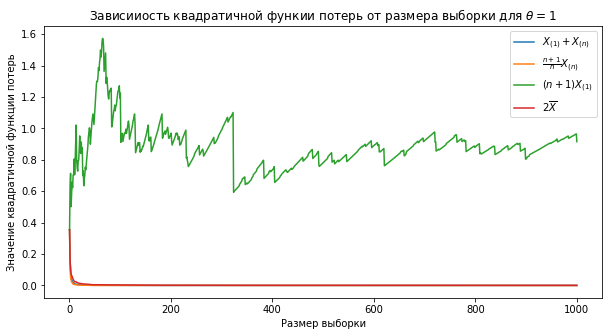

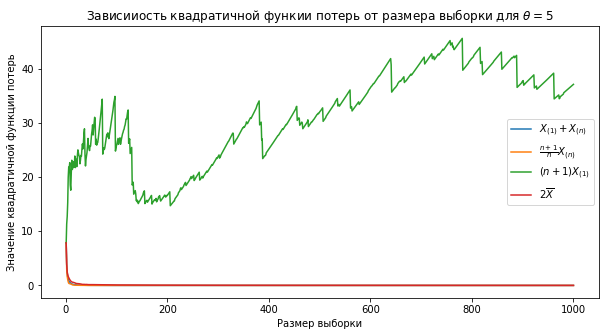

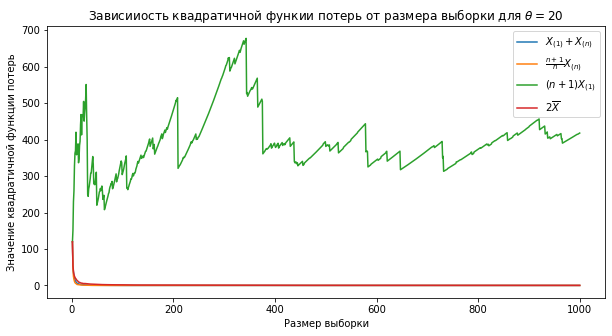

In [5]:
plot_loss(1)
plot_loss(5)
plot_loss(20)

### Наблюдения
Как мы знаем, оценка $(n + 1) X_{(1)}$, в отличие от остальных, не состоятельна. На графиках видно, насколько наличие у оценки свойства состоятельности делает ее лучше в среднеквадратичном подходе. Все четыре оценки несмещенные, но несостоятельная $(n + 1) X_{(1)}$ имеет функцию потерь, как можно предположить по графикам, стремящуюся к $\theta^2$ - и значения совсем не уменьшаются с увеличением размера выборки(подробнее см. далее в разделе "сравнение оценок"). Значит, просто несмещенности мало, чтобы точно найти значение параметра, насколько бы большую выборку мы не взяли. Состоятельные же оценки лучше в среднеквадратичном подходе. И не только лучше, но и "достаточно хороши" в том смысле, что их функция потерь стремится к нулю.

### Теоретические данные
#### Как результат первой теоретической задачи мы знаем:
1. $E_{\theta}(2 \overline{X} - \theta) ^ 2 = \theta ^ 2  \frac{1}{3n}$
2. $E_{\theta}((n + 1) X_{(1)} - \theta) ^ 2 = \theta ^ 2 \frac{n}{n + 2}$
3. $E_{\theta}(\frac {n + 1} {n} X_{(n)} - \theta) ^ 2 = \theta ^ 2 \frac{1}{n(n + 2)}$

#### Посчитаем функцию риска четвертой оценки:
4. $E_{\theta}(X_{(1)} + X_{(n)} - \theta) ^ 2 = EX_{(1)} ^ 2 + EX_{(n)} ^ 2 + \theta ^ 2 +2EX_{(1)}X_{(n)} - 2\theta EX_{(1)} -2\theta EX_{(n)} = \theta ^ 2 (\frac{2}{(n + 1)(n + 2)} + \frac{n}{n + 2} + 1 + \frac{2}{n + 2} - \frac{2}{n + 1} - \frac{2n}{n+1}) = \theta ^ 2 \frac{2}{(n + 1)(n + 2)}$

Reference: http://erepository.uonbi.ac.ke/bitstream/handle/11295/97307/MSc_Project2016.pdf?sequence=1&isAllowed=y, pages 66-70

### Сравнение оценок
$\frac{1}{n(n + 2)} \leq \frac{2}{(n + 1)(n + 2)} \leq \frac{1}{3n} \leq \frac{n}{n + 2}$

$\lim_{x\to\infty} E_{\theta}((n + 1) X_{(1)} - \theta) ^ 2 = \lim_{x\to\infty} \theta ^ 2 \frac{n}{n + 2} = \theta ^ 2$

Подтверждая наше предположение, теперь уже доказываем, что значение квадратичной функции потерь $(n + 1) X_{(1)}$ с ростом размера выборки будет сходиться к $\theta^2$. 

Оценка $2 \overline{X}$ сходится как $\frac{1}{n}$, оценки же $X_{(1)} + X_{(n)}$ и $\frac {n + 1} {n} X_{(n)}$ сходятся быстрее - как $\frac{1}{n^2}$. Значит, эти оценки "достаточно хороши", но все же не равны между собою.

Давайте теперь посмотрим на графики поближе - и без очевидно "плохой" оценки $(n + 1) X_{(1)}$. 

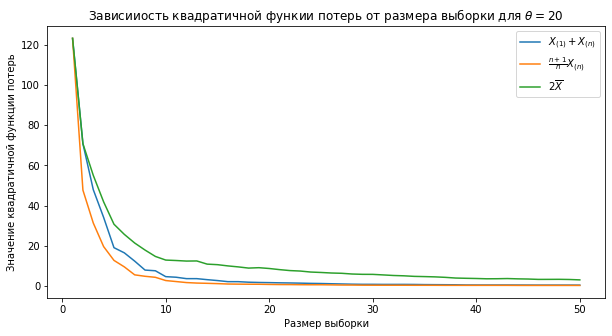

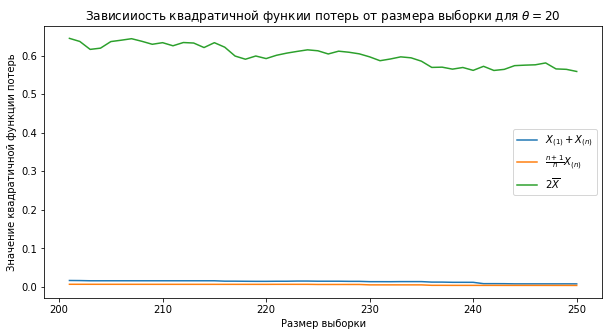

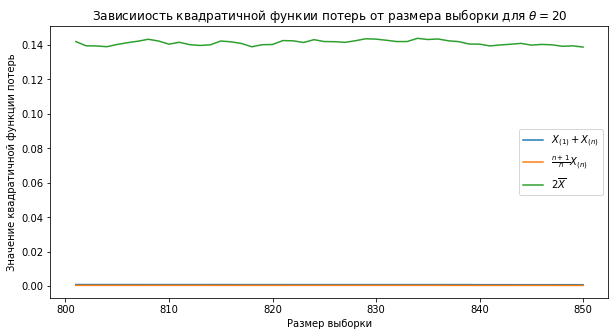

In [6]:
plot_loss(20, Consistent=True, Close=True)
plot_loss(20, Consistent=True, Close=True, Offset=200)
plot_loss(20, Consistent=True, Close=True, Offset=800)

#### Наблюдения
Именно это мы и видим на графике: оценка выборочным средним сходится, но "классово хуже", чем оценки порядковыми статистиками; оценка $\frac {n + 1} {n} X_{(n)}$ сходится сравнительно незначительно в таких масштабах, но быстрее оценки $X_{(1)} + X_{(n)}$. 

Посмотрим теперь, как скорость сходимости зависит от $\theta$

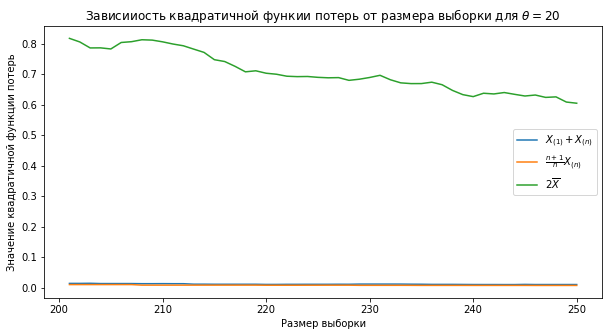

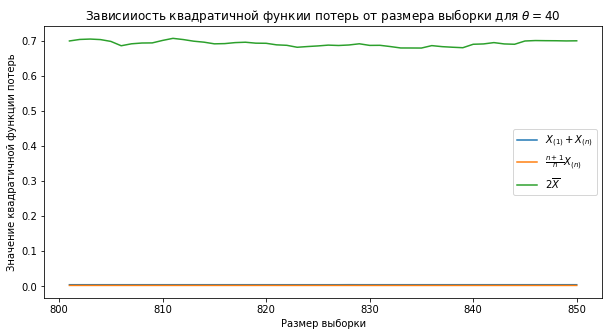

In [7]:
plot_loss(20, Consistent=True, Close=True, Offset=200)
plot_loss(40, Consistent=True, Close=True, Offset=800)

#### Наблюдения
Теоретически мы доказали, что сходятся оценки как $\frac{1}{n}$ и $\frac{1}{n^2}$, но там еще был коэфициент $\theta^2$, которым, как константой, мы пренебрегли. Теперь же мы можем увидеть, что при увеличении $\theta$ в $2$ раза, а размеров выборок в $4$ функция потерь оценки средним сходится примерно одинаково. Также видно, что две другие оценки сходятся асимптотически быстрее - их функции потерь при таком увеличении выборок меньше. 

Посмотрим теперь только на них поближе, и проверим, действительно ли они сходятся асимптотически одинаково и с какой константой.

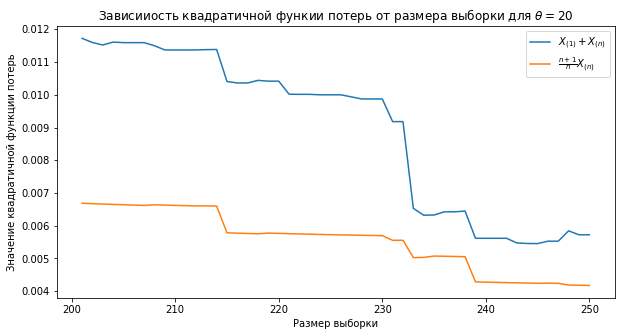

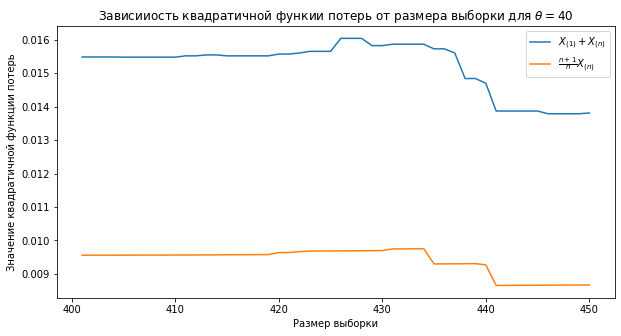

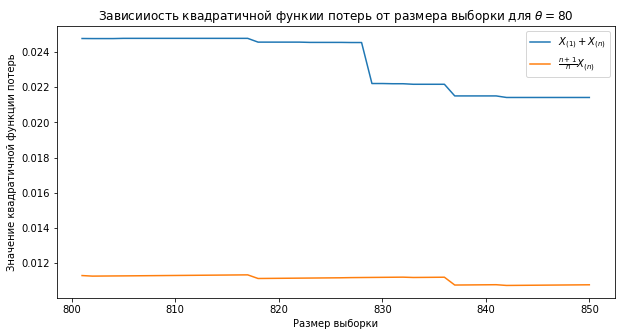

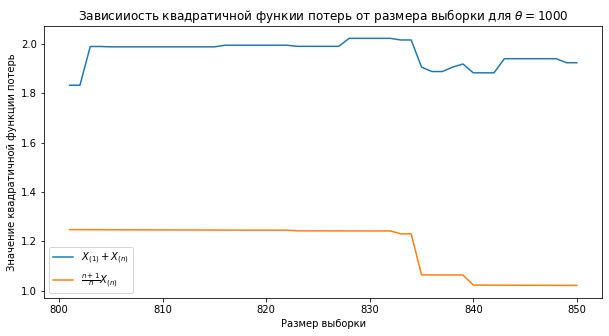

In [8]:
plot_loss(20, SConsistent=True, Close=True, Offset=200)
plot_loss(40, SConsistent=True, Close=True, Offset=400)
plot_loss(80, SConsistent=True, Close=True, Offset=800)
plot_loss(1000, SConsistent=True, Close=True, Offset=800)

#### Наблюдения
На этих графиках мы можем заметить, что, во-первых, сходятся они действительно примерно одинаково - $X_{(1)} + X_{(n)}$ имеет функию потерь менее, чем в три раза большую, чем $\frac {n + 1} {n} X_{(n)}$, причем даже при больших выборках и параметрах; во-вторых, константу мы примерно угадали - значения функций потерь при увеличении и параметра, и выборки в 2 раза близки

Вспомним теперь, в чем различие между оценками: оценка $2 \overline{X}$ состоятельна, в то время как $X_{(1)} + X_{(n)}$ и $\frac {n + 1} {n} X_{(n)}$ сильно состоятельны. Как и хотелось изначально верить, сильно состоятельные оценки качественно лучше в среднеквадратичном подходе.

### Вывод
Не все несмещенные оценки созданы равными. Просто несмещенные оценки, не являющиеся состоятельными, могут оказаться "плохими" в среднеквадратичном подходе - могут иметь функцию потерь, которая с увеличением выборки не будет сходиться к нулю. Состоятельные оценки лучше, их функции потерь уже будут сходиться к нулю, что позволит при достаточно большой выборке достаточно хорошо оценивать параметр. Сильно состоятельные же функции еще лучше, в нашем случае давая асимптотически лучшую скорость сходимости, то есть, сильно состоятельные оценки позволяют достаточно хорошо оценивать параметр с меньшими размерами выборок. Можем ли мы найти "лучшую" в среднеквадратичном смысле выборку и насколько она будет лучше?

# Задача 2
В задаче требуется экспериментально проверить утверждение, что для любой несмещенной оценки $\widehat{\theta} (X)$
    параметра $\theta$ выполнено неравенство Рао-Крамера $$\mathsf{D}_{\theta}
    \widehat{\theta} (X) \geqslant \frac {1} {I_X (\theta)}.$$ Cгенерируйте выборку
    $X_1, ..., X_N$, $N=1000$, из распределений в теоретических задачах (биномиальное распределение, экспоненциальное распределение и нормальное распределение с неизвестным математическим ожиданием). В случае биномиального распределения $m=50$, в случае нормального распределения с неизвестным
    математическим ожиданием $\sigma^2=2.1$. Второй параметр (единственный в случае экспоненциального распределения) выберите случайно из
    распределения $R[0,1]$. Для всех $n \leqslant N$ посчитайте значение эффективной оценки и бутстрепную оценку дисперсии для эффективной оценки (параметрический бутстреп, количество
    бутстрепных выборок равно $500,$ размер каждой равен $n$). Сделайте то же самое с другой несмещенной
    оценкой - в задаче 3 возьмите $\frac{X_1}{m}$, в задаче 4 возьмите $\frac{n-1}{n\overline{X}}$, в задаче 5 возьмите выборочную медиану.
    Постройте графики зависимости бутстрепных оценок дисперсий от размера выборки
    $n$. Для каждой бутстрепной оценки постройте на том же графике кривую
    зависимости $\frac {1} {I_X (\theta)}$ от $n.$

### Теоретические данные
Укажем уже полученные теоретически количества информации и эффективные оценки для каждого распределения:
1. Биномиальное: $i(\theta) = \frac{m}{p(1-p)}, \widehat{\theta} = \frac{\overline{X}}{m}$
2. Экспоненциальное: $i(\theta) = \frac{1}{\lambda^2}, \widehat{\frac{1}{\theta}} = \frac{1}{\overline{X}}$ - и тут нас поджидает первая проблема, потому что не существует эффективной оценки параметра $\theta$. Зато существует эффективная оценка параметра $\frac{1}{\theta}$. Посчитаем оценку $\frac{1}{\theta}$ и возьмем обратное. Да?
3. Нормальное: $i(\theta) = \frac{1}{\sigma^2}, \widehat{\theta} = \overline{X}$

In [9]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

### Функции, строящие графики

In [37]:
# Функция строит график оценки дисперсии по неравенству Рао-Крамера, 
# график бутстрепной оценки дисперсии эффективной и, если указано, 
# неэффективной. Можно явно указать, сколько элементов нужно построить
# и с каким сдвигом
def plot_bootstrap_var(Rao_Cramer_bound, eff_var, ineff_var=None, N=None, offset=0):
    # если N не указано явно, строим все, что есть
    if not N:
        N = len(eff_var)
    
    plt.figure(figsize=(10, 5))
    x = np.arange(offset + 1, offset + N + 1) # область графика
    plt.plot(x, eff_var[offset:offset + N], label='Эффективная оценка')
    
    # если дали неэффективную оценку, строим ее график
    if ineff_var is not None: 
        plt.plot(x, ineff_var[offset: offset + N], label='Неэффективная оценка')
    
    plt.plot(x, Rao_Cramer_bound[offset: offset + N], label='Оценка Рао-Крамера')  
    plt.title("График зависимости дисперсии оценки от размера выборки")
    plt.xlabel("Размер выборки")
    plt.ylabel("Бустрепная оценка дисперсии")
    plt.legend()
    plt.show()
    
# plot_bootstrap_var(R_C_b, e_v, i_v)
# plot_bootstrap_var(R_C_b, e_v[a: a + n], offset=a)
# plot_bootstrap_var(R_C_b, e_v, N = n, offset=a)
# последние две одинаковые, но во второй мы передаем больше
# данных чем нужно для построения графика

In [11]:
# Функция рисует график разности между бутстрепной оценкой
# дисперсии и нижней оценкой дисперсии по неравенству Рао-Крамера
# Можно указать absolute=True, чтобы посмотреть разность по модулю
def plot_var_diff(Rao_Cramer_bound, eff_var, absolute=False, N=None, offset=0):
    # если N не указано явно, строим все, что есть
    if not N:
        N = len(eff_var)
    
    plt.figure(figsize=(10, 5))
    x = np.arange(offset + 1, offset + N + 1) # область графика
    if absolute:
        y = np.absolute(eff_var[offset:offset + N] - Rao_Cramer_bound[offset:offset + N])
        plt.title("График зависимости модуля разности между бутстрепной оценкой дисперсии эффективной оценки и нижней оценки по неравенству Рао-Крамера")
    else:
        y = eff_var[offset:offset + N] - Rao_Cramer_bound[offset:offset + N]
        plt.title("График зависимости разности между бутстрепной оценкой дисперсии эффективной оценки и нижней оценки дисперсии по неравенству Рао-Крамера")
    plt.plot(x, y)
    plt.xlabel("Размер выборки")
    plt.ylabel("Разность")
    plt.show()

### Выборки
Можно запустить функцию resample, чтобы заново выбрать параметры и реализации выборок с новыми параметрами

In [12]:
# Задаем стартовые значение параметра
N = 1000
m = 50
sigma = 2.1
p, lambd, a = 0.5, 0.5, 0.5

# Функции, перевыбирающие параметры и генерирующие выборки

def random_bin_sample():
    global p
    p = sps.uniform.rvs()
    return sps.binom.rvs(m, p, size=N)

def random_exp_sample():
    global lambd
    lambd = sps.uniform.rvs()
    return sps.expon.rvs(scale=lambd, size=N)

def random_norm_sample():
    global a
    a = sps.uniform.rvs()
    return sps.norm.rvs(loc=a, scale=sigma, size=N)

In [13]:
# функции, считающие эффективные оценки

def bin_eff_est(sample):
    return np.cumsum(sample) / np.arange(1, N + 1) / m

def exp_eff_est(sample):
    return np.arange(1, N + 1) / np.cumsum(sample) 

def norm_eff_est(sample):
    return np.cumsum(sample) / np.arange(1, N + 1)

# функции, считающие неэффективные оценки

def bin_ineff_est(sample):
    return np.full(N, sample[0] / m)
# нам не очень-то и нужно передавать всю выборку, но сделаем так
# ради единообразности вызова функций

def exp_ineff_est(sample):
    return np.arange(0, N) / np.arange(1, N + 1) / np.cumsum(sample) 

def norm_ineff_est(sample):
    norm_sample_ineff_est = np.ndarray(1000)
    for i in range(0, N): # сорян, я хз как это нормально делать
        norm_sample_ineff_est[i] = np.median(sample[:i + 1])
    return norm_sample_ineff_est

# Obsolete

def recalc_eff():
    bin_sample_eff_est = np.cumsum(bin_sample) / np.arange(1, N + 1) / m 
    exp_sample_eff_est = np.arange(1, N + 1) / np.cumsum(exp_sample) 
    norm_sample_eff_est = np.cumsum(norm_sample) / np.arange(1, N + 1)

def recalc_ineff():
    bin_sample_ineff_est = np.full(N, bin_sample[0] / m)
    exp_sample_ineff_est = np.arange(0, N) / np.arange(1, N + 1) / np.cumsum(exp_sample) 
    for i in range(0, N):
        norm_sample_ineff_est[i] = np.median(norm_sample[:i + 1])

### Нижние оценки дисперсии по неравенству Рао-Крамера

In [14]:
# полезно держать их функциями, потому что параметры могут меняться
def calc_Rao_Cramer_bound_bin():
    return 1 / (np.arange(1, N + 1) * (m / (p * (1 - p))))

def calc_Rao_Cramer_bound_exp():
    return lambd ** 2 / np.arange(1, N+1)

def calc_Rao_Cramer_bound_norm():
    return 1 / (np.arange(1, N + 1) * (1 / sigma))

### Бутстрепные оценки дисперсии
Осторожно, долго считаются. Вопрос в доке так и остался без ответа, и сильно быстрее я не умею. Можно сходить заварить чаю...

In [35]:
# (obsolete) гений функциопроектирования
# на самом деле, какя-то стремная абоминация, 
# но считает массив бутстрепных дисперсий в зависимости от размера выборки
# нужно указать распределение каким-то стремным костылем

# (obsolete) бутстрепные выборки создаются циклом, потому что на префиксе длины n
# размер выборки должен быть таким же - и для каждого префикса свой параметр
# и я не знаю, как взять такую выборку - можно брать с массивом параметров, но
# тогда нельзя получить массив, в котором n-я строка имеет длину n - это даже не
# прямоугольник, numpy такое не любит. 

# (obsolete) опытным путем установлено, что быстрее работает, если сделать прямоугольник, 
# и просто в n-й строке брать первые n элементов для подсчета оценки
# пусть и нам в первых строчках почти никакие данные не пригодятся

# На что я трачу свою жизнь? Прак по статам, а не по питону. Правда?
# Правда, если его с такой ментальностью проверять...

# Кажется, в природе существует сакральное знание, доступное, правда, только высшим
# существам с продвинутого потока о том, почему размер каждой бутстрэпной выобрки
# должен быть равен размеру изначальной. И это бы объяснило все эти страдания,
# но в предыдущем дз, в котором вводился бутстрэп про это нет ни слова. Опрделение
# же подразумевает, что размеров они могут быть разных... Что самое забавное, если 
# загуглить "бутстрэпная оценка дисперсии", можно найти домашку по статам 2016 года
# странно похожую на нашу. И там есть предложение "По умолчанию(если не сказано 
# обратного) считается, что размер бутстрэпной выборки совпадает с размером выборки"
# Да, все еще не сказано почему... Но ведь сказано! Зачем было удалять это предложение
# при копипасте домашки в 2019 год?

bin_sample = random_bin_sample()
bin_sample_eff_est = bin_eff_est(bin_sample)
bin_sample_ineff_est = bin_ineff_est(bin_sample)
bootstrap_bin_eff_var = np.ndarray(N)
bootstrap_bin_ineff_var = np.ndarray(N)
for n in range(1, N + 1):
    bootsrtap_bin_sample_eff = sps.binom.rvs(m, bin_sample_eff_est[n - 1], size = (500, n))
    bootstrap_bin_eff_var[n - 1] = (bootsrtap_bin_sample_eff.mean(axis=1) / m).var()
    bootsrtap_bin_sample_ineff = sps.binom.rvs(m, bin_sample_ineff_est[n - 1], size = (500, 1))
    # нам все равно нужен только первый элемент
    bootstrap_bin_ineff_var[n - 1] = (bootsrtap_bin_sample_ineff / m).var()
    

exp_sample = random_exp_sample()
exp_sample_eff_est = exp_eff_est(exp_sample)
exp_sample_ineff_est = exp_ineff_est(exp_sample)
bootstrap_exp_eff_var = np.ndarray(N)
bootstrap_exp_ineff_var = np.ndarray(N)
for n in range(1, N + 1):
    bootsrtap_exp_sample_eff = sps.expon.rvs(exp_sample_eff_est[n - 1], size = (500, n))
    bootstrap_exp_eff_var[n - 1] = (1 / bootsrtap_exp_sample_eff.mean(axis=1)).var()
    bootsrtap_exp_sample_ineff = sps.expon.rvs(exp_sample_ineff_est[n - 1], size = (500, n))
    bootstrap_exp_ineff_var[n - 1] = ( ((n - 1) / n) / bootsrtap_exp_sample_ineff.mean(axis=1)).var()

    
norm_sample = random_norm_sample()
norm_sample_eff_est = norm_eff_est(norm_sample)
norm_sample_ineff_est = norm_ineff_est(norm_sample)
bootstrap_norm_eff_var = np.ndarray(N)
bootstrap_norm_ineff_var = np.ndarray(N)
for n in range(1, N + 1):
    bootsrtap_norm_sample_eff = sps.norm.rvs(norm_sample_eff_est[n - 1], size = (500, n))
    bootstrap_norm_eff_var[n - 1] = (bootsrtap_norm_sample_eff.mean(axis=1)).var()
    bootsrtap_norm_sample_ineff = sps.norm.rvs(norm_sample_ineff_est[n - 1], size = (500, n))
    bootstrap_norm_ineff_var[n - 1] = (np.median(bootsrtap_norm_sample_ineff, axis=1)).var()
    
    
# Посчитаем оценки рао-крамера
Rao_Cramer_bound_bin = calc_Rao_Cramer_bound_bin()
Rao_Cramer_bound_exp = calc_Rao_Cramer_bound_exp()
Rao_Cramer_bound_norm = calc_Rao_Cramer_bound_norm()

## Экспериментальная часть

### Биномиальное распределение
Построим график зависимости дисперсии оценки от размера выборки. Также построим для сравнения график нижней оценки по неравенству Рао-Крамера.

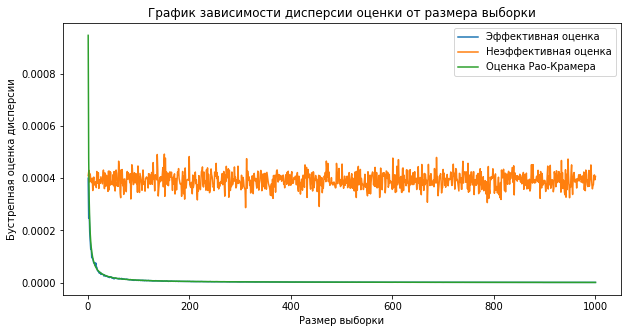

In [16]:
plot_bootstrap_var(Rao_Cramer_bound_bin, bootstrap_bin_eff_var, bootstrap_bin_ineff_var)

#### Явно видно, что дисперсия неэффективной оценки мало того, что больше эффективной, так еще и не собирается сходиться к нулю. Что неудивительно, потому что неэффективная оценка - $\frac{X_1}{m}$. Она просто не улучшается с увеличением размера выборки. Уберем ее с графика:

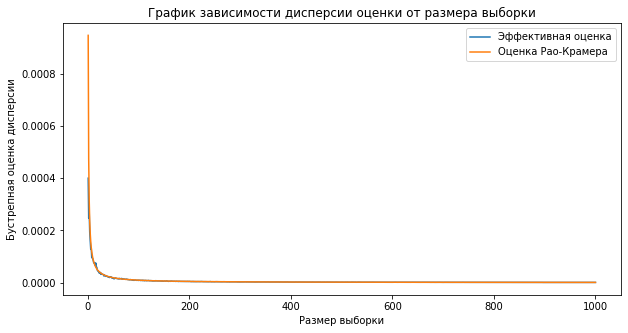

In [17]:
plot_bootstrap_var(Rao_Cramer_bound_bin, bootstrap_bin_eff_var)

#### На этом графике визуально кажется, что дисперсия эффективной оценки совпадает с оценкой дисперсии по неравенству Рао-Крамера - что, конечно же, и было бы ожидаемым результатом. Тем не менее, на таком графике непонятно, насколько и как они "совпадают". Посмотрим поближе:

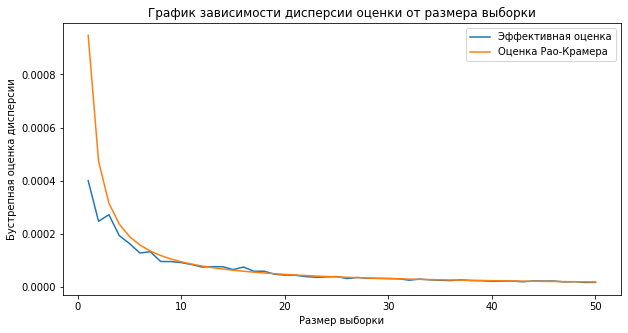

In [18]:
plot_bootstrap_var(Rao_Cramer_bound_bin, bootstrap_bin_eff_var, N=50)

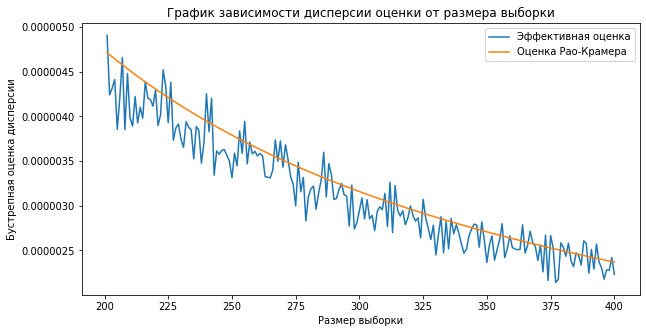

In [19]:
plot_bootstrap_var(Rao_Cramer_bound_bin, bootstrap_bin_eff_var, N=200, offset=200)

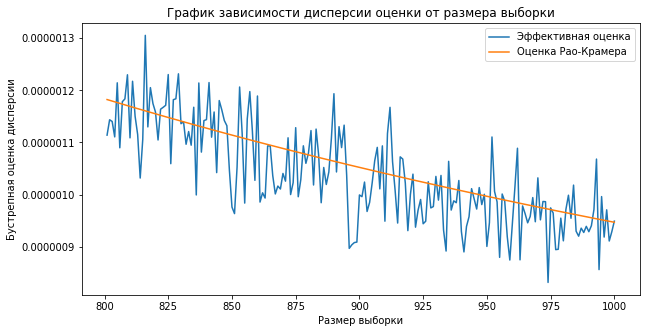

In [20]:
plot_bootstrap_var(Rao_Cramer_bound_bin, bootstrap_bin_eff_var, N=200, offset=800)

#### Как мы видим, эффективная оценка действительно очень близка к оценке по неравенству Рао-Крамера при любом размере выборки. Нас не должно смущать, что эффективная оценка регулярно имеет дисперсию меньше, чем ограничивает снизу неравенство Рао-Крамера, потому что это издержка бутстрэпного метода оценки дисперсии. Возьми мы больше бутстрэпных выборок, мы бы получили значения дисперсии значительно ближе к дисперсии в неравенстве Рао-Крамера. Подробнее см. задачу 3. Пока же можно также предположить, что чем больше выборка, тем ближе дисперсия эффективной оценки к дисперсии в неравенстве Рао-Крамера. Проверим это: построим график разности дисперсий.

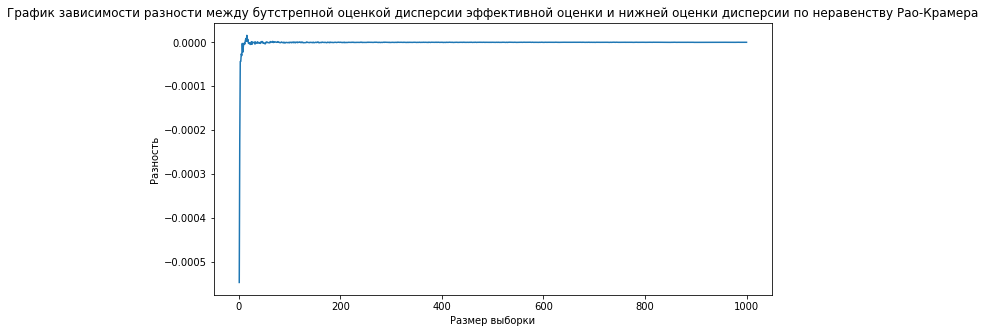

In [21]:
plot_var_diff(Rao_Cramer_bound_bin, bootstrap_bin_eff_var)

#### Общая тенденция именно такая. Давайте теперь будем брать разность по модулю, потому что нас в первую очередь интересует, насколько близки дисперсии. Для большей уверенности убедимся, что это так, посмотрев поближе на некоторые участки графика:

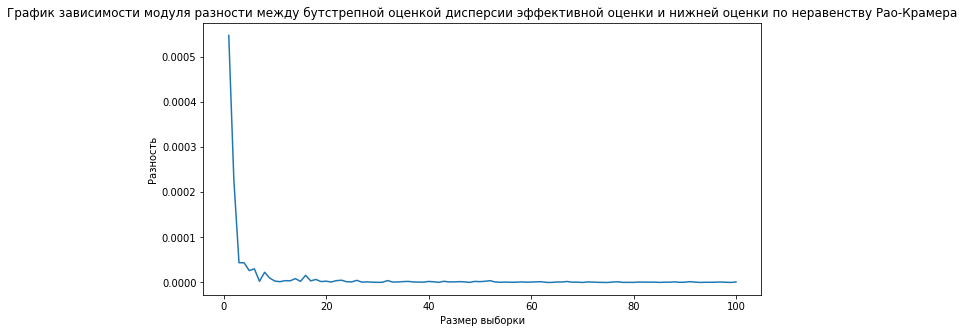

In [22]:
plot_var_diff(Rao_Cramer_bound_bin, bootstrap_bin_eff_var, absolute=True, N=100)

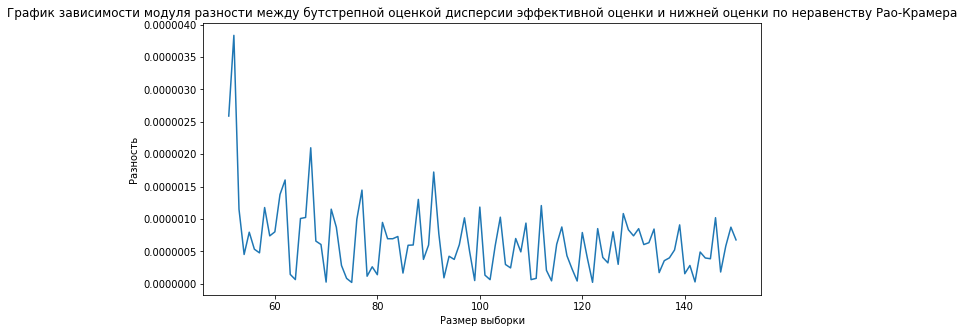

In [23]:
plot_var_diff(Rao_Cramer_bound_bin, bootstrap_bin_eff_var, absolute=True, N=100, offset=50)

#### Разность на одноэлементной выборке была уже меньше $5 \cdot 10^{-4}$, на 100 элементах мы получаем точность уже в $10^{-5}$. Убедимся, что чем дальше, тем ближе к нулю, что позволит нам опытно подтвердить - а вернее не опровергнуть - предположение, что дисперсия эффективной оценке сходится к дисперсии Рао-Крамера.

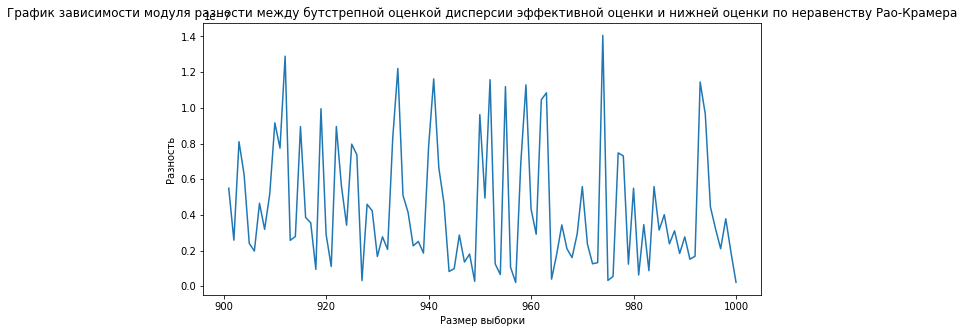

In [24]:
plot_var_diff(Rao_Cramer_bound_bin, bootstrap_bin_eff_var, absolute=True, N=100, offset=900)

#### Если присмотреться, в слове "между" в названии графика спряталось 1e-7. Прошу у читателя прощения за эту оплошность. Тем не менее, желаемый результат получен. Прежде, чем переходить к обсуждению результатов, давайте посмотрим на другие распределения.

## Экспоненциальное распределение

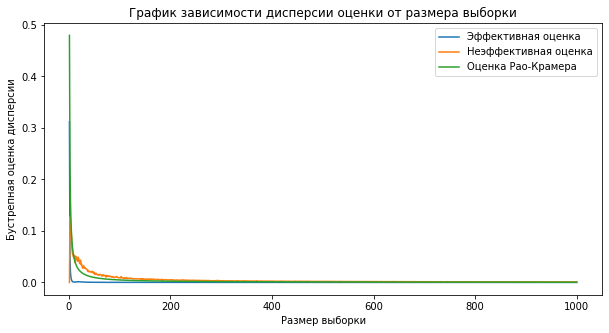

In [25]:
plot_bootstrap_var(Rao_Cramer_bound_exp, bootstrap_exp_eff_var, bootstrap_exp_ineff_var)

#### Заметим, что теперь дисперсия неэффективной оценки тоже сходится к нулю. Да и сама оценка при $n \rightarrow \infty$ стремится к эффективной. Результат соответствует ожиданиям, за исключением очень маленьких выборок. Посмотрим внимаательнее:

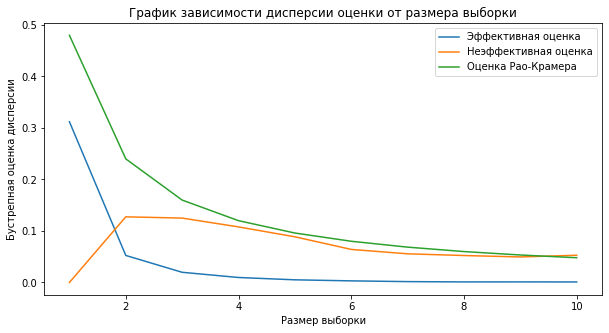

In [26]:
plot_bootstrap_var(Rao_Cramer_bound_exp, bootstrap_exp_eff_var, bootstrap_exp_ineff_var, N = 10)

#### Как мы видим, неэффективная оценка имеет проблему лишь при $n = 1$. Объяснить это можно видом оценки: $\frac{n-1}{n\overline{X}}$ - при $n = 1$ она просто всегда равна нулю, независимо от выборки. Но теперь возникает другой повод для беспокойства: эффективная оценка иммет дисперсию лучше, чем теоретически может. Убедимся:

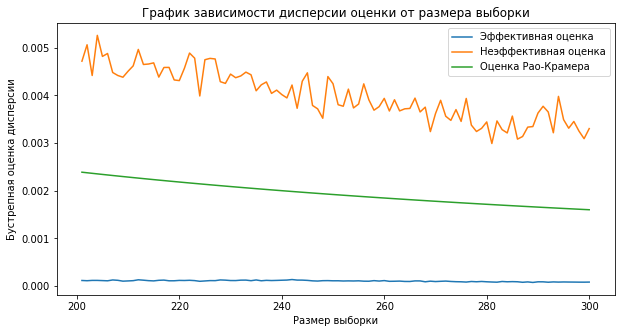

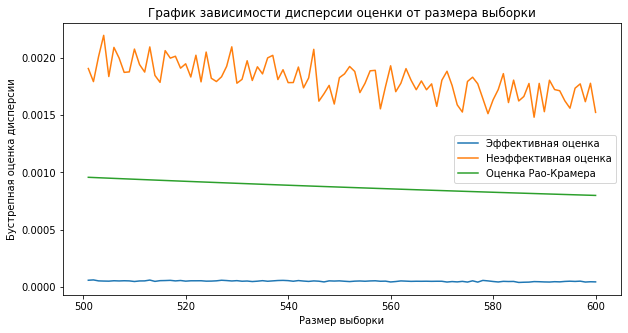

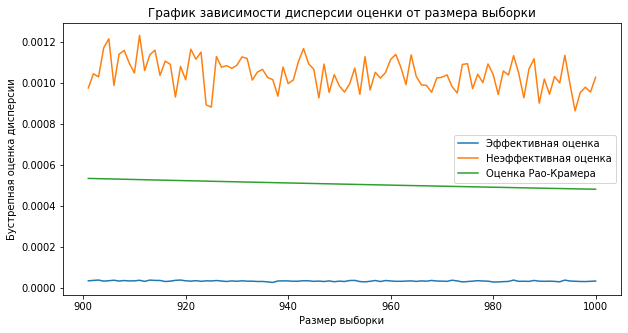

In [27]:
plot_bootstrap_var(Rao_Cramer_bound_exp, bootstrap_exp_eff_var, bootstrap_exp_ineff_var, N = 100, offset = 200)
plot_bootstrap_var(Rao_Cramer_bound_exp, bootstrap_exp_eff_var, bootstrap_exp_ineff_var, N = 100, offset = 500)
plot_bootstrap_var(Rao_Cramer_bound_exp, bootstrap_exp_eff_var, bootstrap_exp_ineff_var, N = 100, offset = 900)

#### Похоже, что нельзя просто так оценить $\frac{1}{\theta}$, взять обратное и сделать вид, что оценили $\theta$ эффективно. Иначе существовала бы эффективная оценка для $\theta$. 

## Нормальное распределение

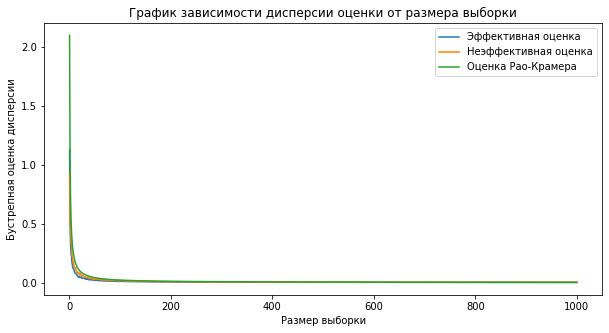

In [28]:
plot_bootstrap_var(Rao_Cramer_bound_norm, bootstrap_norm_eff_var, bootstrap_norm_ineff_var)

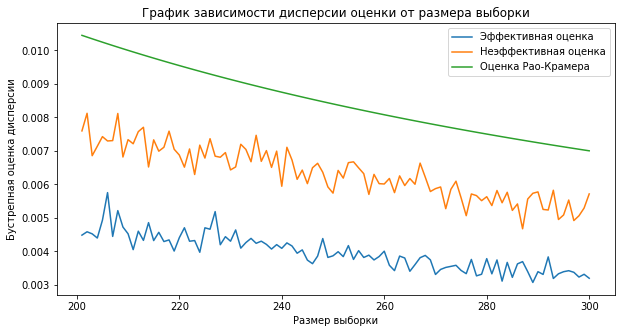

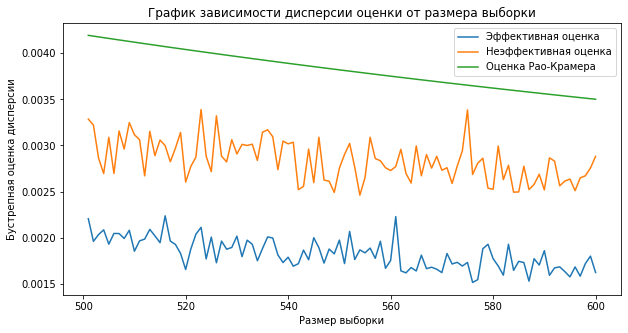

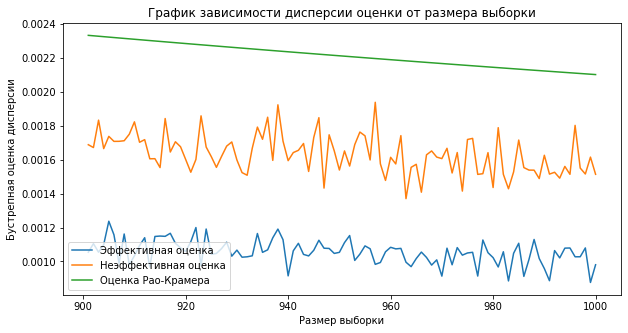

In [29]:
plot_bootstrap_var(Rao_Cramer_bound_norm, bootstrap_norm_eff_var, bootstrap_norm_ineff_var, N = 100, offset = 200)
plot_bootstrap_var(Rao_Cramer_bound_norm, bootstrap_norm_eff_var, bootstrap_norm_ineff_var, N = 100, offset = 500)
plot_bootstrap_var(Rao_Cramer_bound_norm, bootstrap_norm_eff_var, bootstrap_norm_ineff_var, N = 100, offset = 900)

### Мистика какая-то...

### Вывод
Неравенство Рао-Крамера (не)выполнено для любой(нет) оценки ;(

# Задача 3

Рассмотрим $X_1, ..., X_n \sim Bern(\theta)$. По сетке значений $\theta \in
    [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии
    произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. Какой
    можно сделать вывод (напишите в комментариях)? Для каждого значения $\theta$
    (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$,
    посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии
    (параметрический бутстреп, количество бутстрепных выборок равно $500$) этой
    эффективной оценки $\theta$. Нарисуйте график зависимости полученных бутстрепных
    оценок от $\theta$.

### Выбор оценок
Возьмем для сравнения оценки $X_1$, $\frac{X_1 + X_2}{2}$, $\frac{1}{10}\sum\limits_{i=1}^{10} X_i$ и $\overline{X}$. Очевидно, все будут несмещенными. И, как нам известно, $\overline{X}$ является эффективной. Также мы знаем, чему равно количество информации в одном элементе выборки - $\frac{1}{\theta(1-\theta)}$. Тогда нижними оценками на дисперсию по неравенству Рао-Крамера будут:
1. $D_\theta X_1 \geq \theta(1-\theta)$
2. $D_\theta \frac{X_1 + X_2}{2} \geq \frac{\theta(1-\theta)}{2}$
3. $D_\theta \frac{1}{10}\sum\limits_{i=1}^{10} X_i \geq \frac{\theta(1-\theta)}{10}$
4. $D_\theta \overline{X} \geq \frac{\theta(1-\theta)}{n}$

Заметим, что, как и подсказывает нам здравый смысл, чем больше элементов выборки мы используем для определения параметра, тем ближе к истинному значению параметра, скорее всего, окажемся.

### Нижняя оценка выборочной дисперсии
Построим графики зависимости нижней оценки дисперсии от $\theta$ для первых трех оценок.

In [30]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

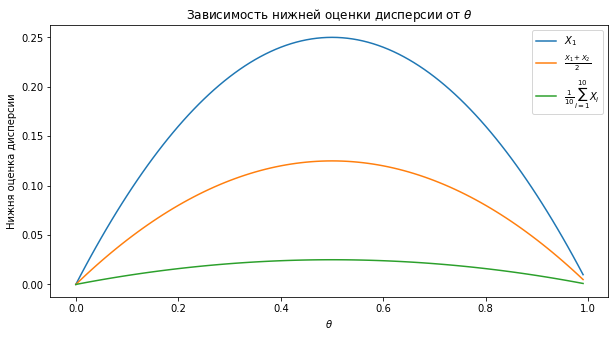

In [31]:
theta = np.arange(0, 1, 0.01)
ir = theta * (1 - theta) # 1/i - обратное к информации в одном элементе
plt.figure(figsize=(10, 5))
plt.plot(theta, ir, label='$X_1$')
plt.plot(theta, ir / 2, label='$\\frac{X_1 + X_2}{2}$')
plt.plot(theta, ir / 10, label='$\\frac{1}{10}\\sum_{i=1}^{10} X_i$')
plt.title("Зависимость нижней оценки дисперсии от $\\theta$")
plt.xlabel('$\\theta$')
plt.ylabel('Нижня оценка дисперсии')
plt.legend()
plt.show()

### Наблюдения
Первым и очевидным наблюдением будет то, что чем больше элементов выборки мы используем, тем меньше выборочная дисперсия. Вторым наблюдением будет то, что дисперсия максимальна в $\theta = 0.5$ и убывает к краям. Вспомним теперь, какой эксперимент иллюстрирует распределение Бернулли: подбрасывание монетки. Будем считать, что вероятность выпадения орла равна $\theta$, а решки - $1 - \theta$. Если параметр близок к $0.5$, то в маленьких выборках могут оказаться любые данные: скажем, вероятность получить два орла или две решки на $X_1, X_2$ будет равна $\frac{1}{2}$, и в этих случаях наша оценка закономерно предоставит нам значения параметра $\theta = 0$ и $\theta = 1$ соответственно. Для значений же параметра ближе к краям - заметим также, что симметричность графиков не случайна, потому что симметричен и эксперимент: достаточно поменять орла и решку местами, - вероятность получить слишком много противоположных выпадений меньше: скажем, при $\theta = 0.25$ вероятность получить на двух подбрасываниях максимально неверную оценку всего $\frac{1}{16}$, а любое другое значение оценки - как $0.5$, так и $0$, - ближе к $0.25$, чем $0$ и $1$ к $0.5$. На сильно крайних значениях $\theta$ параметр почти всегда - вероятность успеха буквально задается параметром - можно оценить и на одном подбрасывании, и уж тем более на двух. Так, для $\theta = 0.01$ оценка $\frac{X_1 + X_2}{2}$ будет ошибаться с вероятность лишь в $0.0199$. 

### Эффективная оценка

In [32]:
# функция, считающая бутстрэпную оценку дисперсии в нашем конкретном случае
def bootstrap_3(eff_est, bootstrap_size=500):
    bootstrap_sample = sps.bernoulli.rvs(eff_est, size = (bootstrap_size, 1000, 100)) # параметрический бутстреп

    bootstrap_mean_est = bootstrap_sample.mean(axis=1) # берем эффективную оценку по каждой выборке

    bootstrap_var = bootstrap_mean_est.var(axis=0) # считаем бутстрепную оценку дисперсии
    
    return bootstrap_var

#функция для построения графика
def plot_3(bootstrap_var):
    plt.figure(figsize=(10, 5))
    plt.plot(theta, bootstrap_var, label='$s^2(\\overline{X})$')
    # также построим график нижней оценки дисперсии из неравенства Рао-Крамера для сравнения
    plt.plot(theta, theta * (1 - theta) / 1000, label='$D_\\theta \\overline{X}$') 
    plt.title('График зависимости бутстрепной оценки дисперсии от $\\theta$')
    plt.xlabel('$\\theta$')
    plt.ylabel('Дисперсия')
    plt.legend()
    plt.show()

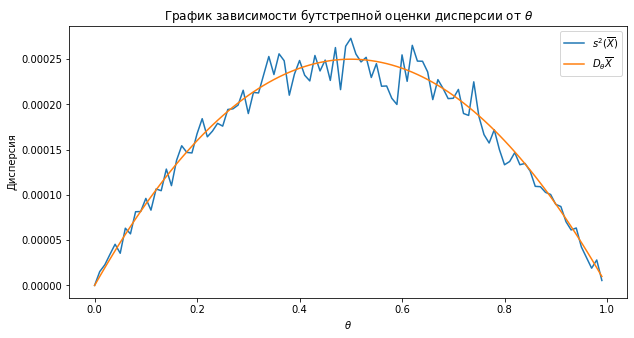

In [33]:
sample = sps.bernoulli.rvs(theta, size=(1000,100)) # выборка на 1000 для каждого theta

mean_est = sample.mean(axis=0) # эффективная оценка - выборочное среднее

plot_3(bootstrap_3(mean_est))

### Почему выборочная дисперсия бывает меньше *нижней* оценки?
Как и обещали читателю в задаче 2, вернемся теперь к этому вопросу. Я не обладаю достаточным теоретическим знанием, чтобы позитивно утверждать, что это изержка бутстрэпного метода, но предложу все же проверить это на практике. Чтобы это проверить, построим График зависимости бутстрепной оценки дисперсии от $\theta$ для бутстрэпов больше размером. Осторожно, большие размеры влекут увеличение времени работы.

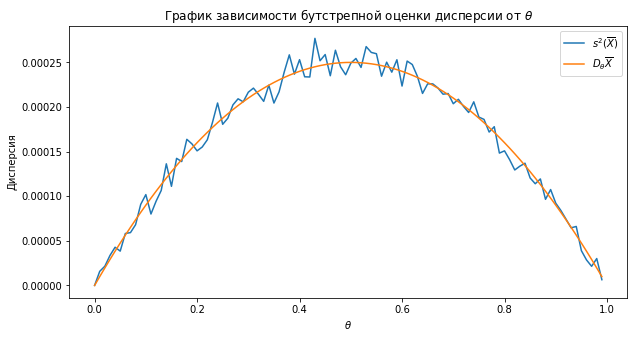

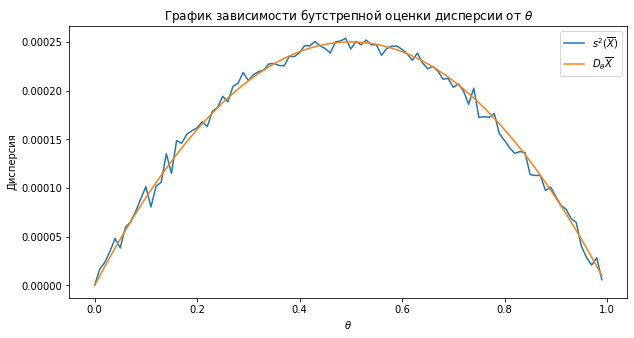

MemoryError: 

In [34]:
plot_3(bootstrap_3(mean_est, bootstrap_size=1000))
plot_3(bootstrap_3(mean_est, bootstrap_size=5000))
plot_3(bootstrap_3(mean_est, bootstrap_size=15000))

При общей спекулятивности предположения, думаю, можно считать "наглядную" демонстрацию достаточной для наших целей. По меньшей мере, выдвинутое предположение - о ограниченности бутстрэпного метода количеством бутстрэпных выборок - мы не опровергли. Несмотря на всю его естественность, о его верности говорить пока не будем.

### Вывод
Критерий эффективности позволяет нам находить оценку, лучшую в средниквдратичном подходе, через неравенство Рао-Крамера. Мы проверили, действительно ли найденная теоретически эффективная оценка достигает заявленных в неравенстве Рао-Крамера значений дисперсии. И действительно, эффективная оценка позволяет с большой точностью оценить значение параметра. Так, уже при выборке из распределения Бернулли размером в 1000, дисперсия оценки не превосходит $0.0003$. Но полученные нами значения дисперсии для эффективной оценки соответствуют нижней оценки почти идеально, и добиться лучшего в среднеквадратичном смысле результата не получится - снизу нас подпирает неравенство Рао-Крамера.